In [1]:
### Download libraries
#%pip install uproot 
#%pip install awkward 
#%pip install mplhep 
#%pip install numpy 
#%pip install matplotlib 
#%pip install scipy

### Upgrade libraries to latest version
#%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade

In [2]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

### Electrons

In [214]:
path_data = 'Data/'
#path_mc = 'samples/data'

### Open the file introducing file path
file = uproot.open(path_data+'ee.root')
ttree_name = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
file[ttree_name].keys()

## Load branches
branches = file[ttree_name].arrays()

## Define an numpy array for 'Pcharged'
var = 'Pcharged'
var1 = 'Ncharged'
var2 = 'E_ecal'
var3 = 'E_hcal'
pchar_e = ak.to_numpy(branches[var]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
nchar_e = ak.to_numpy(branches[var1]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_e_e = ak.to_numpy(branches[var2]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_h_e = ak.to_numpy(branches[var3]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions

print(f"Array of type '{type(pchar_e)}' defined for '{var}':\n{pchar_e}")
print(pchar_e.max())
print(f"Array of type '{type(nchar_e)}' defined for '{var1}':\n{nchar_e}")
print(nchar_e.max())
print(f"Array of type '{type(E_e_e)}' defined for '{var2}':\n{E_e_e}")
print(E_e_e.max())
print(f"Array of type '{type(E_h_e)}' defined for '{var3}':\n{E_h_e}")
print(E_h_e.max())


Array of type '<class 'numpy.ndarray'>' defined for 'Pcharged':
[81.32794  71.334854  0.       ... 73.69003  81.64756  80.798645]
55299.59
Array of type '<class 'numpy.ndarray'>' defined for 'Ncharged':
[2. 2. 0. ... 2. 2. 2.]
9.0
Array of type '<class 'numpy.ndarray'>' defined for 'E_ecal':
[88.92962  90.303406 89.63274  ... 96.30155  92.580894 89.81569 ]
124.320595
Array of type '<class 'numpy.ndarray'>' defined for 'E_hcal':
[0.   0.   3.19 ... 0.   0.   0.  ]
82.450005


In [215]:
## Create a mask for certain selection
mymask = branches['Pcharged'] <= 150
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask)}' out of '{len(mymask)}' events passed the cut 'mymask'")

A total of '93454' out of '93802' events passed the cut 'mymask'


In [223]:
## Create a mask for certain selection
mymask2 = branches['Ncharged'] <= 10
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask2)}' out of '{len(mymask2)}' events passed the cut 'mymask'")

A total of '93802' out of '93802' events passed the cut 'mymask'


In [217]:
## Create a mask for certain selection
mymask3 = branches['E_ecal'] >= 50
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask3)}' out of '{len(mymask3)}' events passed the cut 'mymask'")

A total of '93726' out of '93802' events passed the cut 'mymask'


In [218]:
## Create a mask for certain selection
mymask4 = branches['E_hcal'] <= 5
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask4)}' out of '{len(mymask4)}' events passed the cut 'mymask'")

A total of '90458' out of '93802' events passed the cut 'mymask'


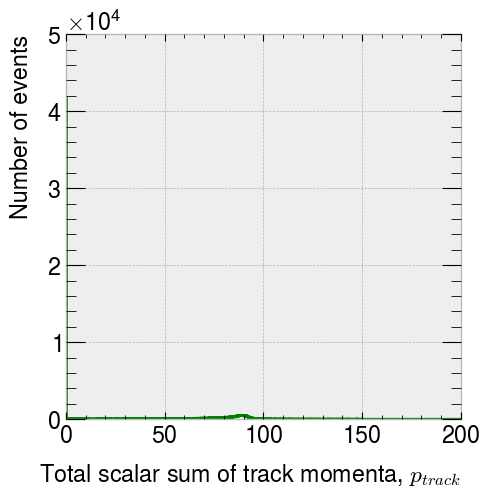

In [224]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(pchar_e[mymask],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Pcharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track momenta, $p_{track}$')
plt.ylabel('Number of events')
plt.show()

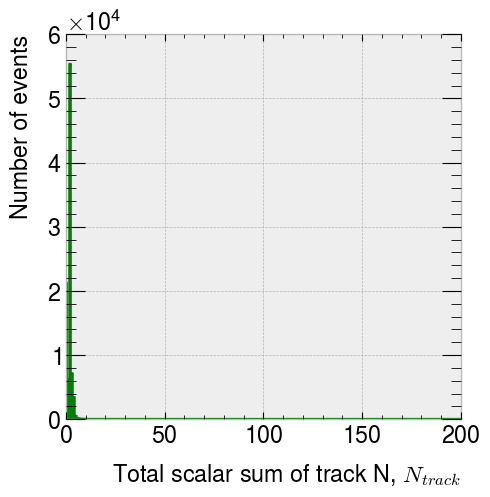

In [225]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(nchar_e[mymask2],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Ncharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track N, $N_{track}$')
plt.ylabel('Number of events')
plt.show()

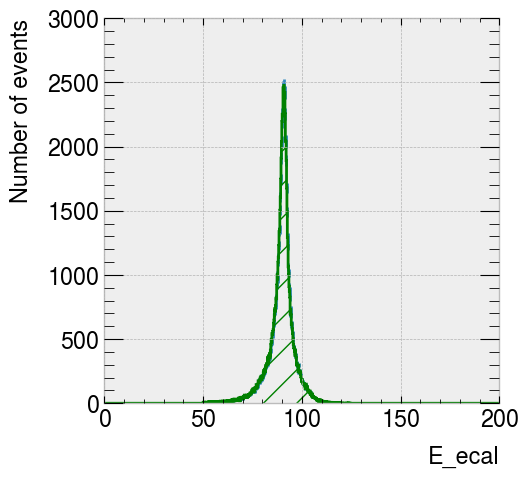

In [226]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_e_e[mymask3],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_ecal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('E_ecal')
plt.ylabel('Number of events')
plt.show()

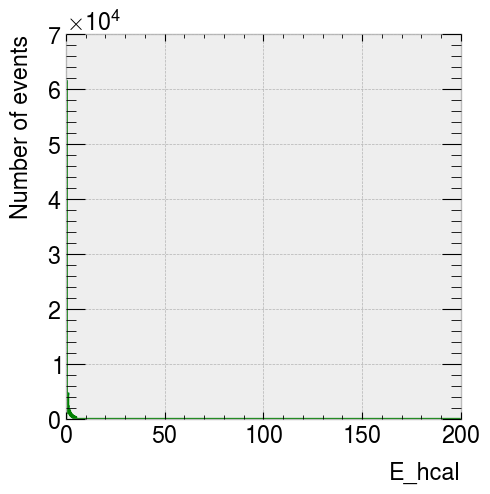

In [227]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_h_e[mymask4],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_hcal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('E_hcal')
plt.ylabel('Number of events')
plt.show()

### Taus

In [228]:
path_data = 'Data/'
#path_mc = 'samples/data'

### Open the file introducing file path
file = uproot.open(path_data+'tt.root')
ttree_name = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
file[ttree_name].keys()

## Load branches
branches = file[ttree_name].arrays()

## Define an numpy array for 'Pcharged'
var = 'Pcharged'
var1 = 'Ncharged'
var2 = 'E_ecal'
var3 = 'E_hcal'
pchar_t = ak.to_numpy(branches[var]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
nchar_t = ak.to_numpy(branches[var1]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_e_t = ak.to_numpy(branches[var2]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_h_t = ak.to_numpy(branches[var3]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions

print(f"Array of type '{type(pchar_t)}' defined for '{var}':\n{pchar_t}")
print(pchar_t.max())
print(f"Array of type '{type(nchar_t)}' defined for '{var1}':\n{nchar_t}")
print(nchar_t.max())
print(f"Array of type '{type(E_e_t)}' defined for '{var2}':\n{E_e_t}")
print(E_e_t.max())
print(f"Array of type '{type(E_h_t)}' defined for '{var3}':\n{E_h_t}")
print(E_h_t.max())


Array of type '<class 'numpy.ndarray'>' defined for 'Pcharged':
[25.156181 21.133148 59.023323 ... 33.127083 54.095062 17.629349]
719342.8
Array of type '<class 'numpy.ndarray'>' defined for 'Ncharged':
[2. 2. 2. ... 2. 4. 2.]
18.0
Array of type '<class 'numpy.ndarray'>' defined for 'E_ecal':
[11.392693 20.010029  6.71654  ... 38.649517 28.047812 29.352995]
101.030716
Array of type '<class 'numpy.ndarray'>' defined for 'E_hcal':
[ 2.6680105  0.4989622 15.956976  ...  0.        13.32479    1.2498789]
110.909996


In [229]:
## Create a mask for certain selection
mymask = branches['Pcharged'] <= 100
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask)}' out of '{len(mymask)}' events passed the cut 'mymask'")

A total of '78926' out of '79214' events passed the cut 'mymask'


In [230]:
## Create a mask for certain selection
mymask2 = branches['Ncharged'] <= 5
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask2)}' out of '{len(mymask2)}' events passed the cut 'mymask'")

A total of '75058' out of '79214' events passed the cut 'mymask'


In [231]:
## Create a mask for certain selection
mymask3 = branches['E_ecal'] <= 80
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask3)}' out of '{len(mymask3)}' events passed the cut 'mymask'")

A total of '79073' out of '79214' events passed the cut 'mymask'


In [232]:
## Create a mask for certain selection
mymask4 = branches['E_hcal'] <= 5
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask4)}' out of '{len(mymask4)}' events passed the cut 'mymask'")

A total of '44510' out of '79214' events passed the cut 'mymask'


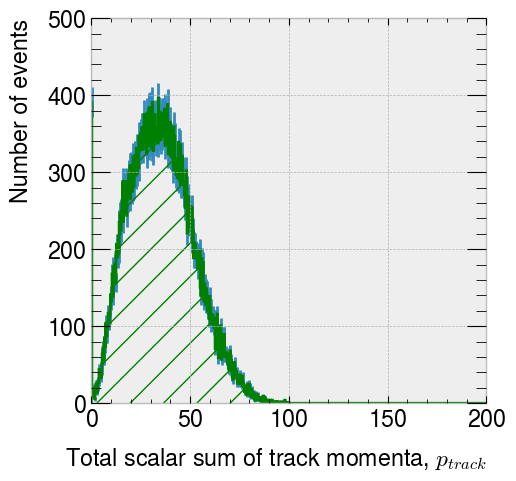

In [233]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(pchar_t[mymask],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Pcharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track momenta, $p_{track}$')
plt.ylabel('Number of events')
plt.show()

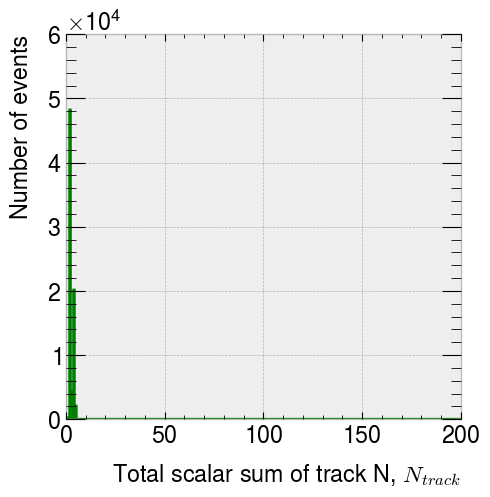

In [234]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(nchar_t[mymask2],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Ncharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track N, $N_{track}$')
plt.ylabel('Number of events')
plt.show()

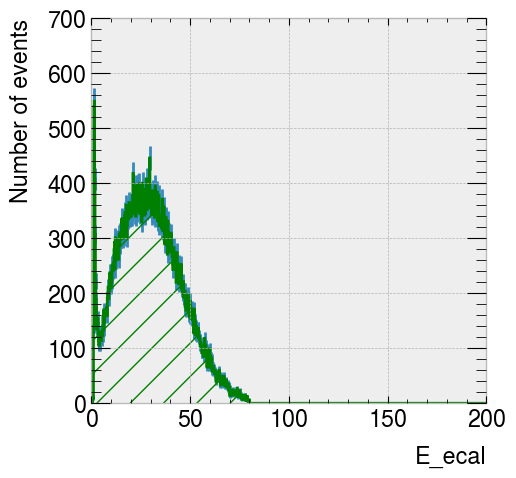

In [235]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_e_t[mymask3],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_ecal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('E_ecal')
plt.ylabel('Number of events')
plt.show()

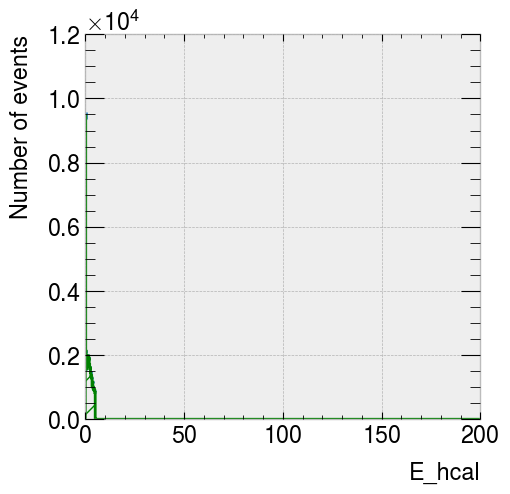

In [236]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_h_t[mymask4],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_hcal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('E_hcal')
plt.ylabel('Number of events')
plt.show()

### Muons

In [237]:
path_data = 'Data/'
#path_mc = 'samples/data'

### Open the file introducing file path
file = uproot.open(path_data+'mm.root')
ttree_name = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
file[ttree_name].keys()

## Load branches
branches = file[ttree_name].arrays()

## Define an numpy array for 'Pcharged'
var = 'Pcharged'
var1 = 'Ncharged'
var2 = 'E_ecal'
var3 = 'E_hcal'
pchar_m = ak.to_numpy(branches[var]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
nchar_m = ak.to_numpy(branches[var1]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_e_m = ak.to_numpy(branches[var2]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_h_m = ak.to_numpy(branches[var3]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions

print(f"Array of type '{type(pchar_m)}' defined for '{var}':\n{pchar_m}")
print(pchar_m.max())
print(f"Array of type '{type(nchar_m)}' defined for '{var1}':\n{nchar_m}")
print(nchar_m.max())
print(f"Array of type '{type(E_e_m)}' defined for '{var2}':\n{E_e_m}")
print(E_e_m.max())
print(f"Array of type '{type(E_h_m)}' defined for '{var3}':\n{E_h_m}")
print(E_h_m.max())


Array of type '<class 'numpy.ndarray'>' defined for 'Pcharged':
[63.769375 87.26109  89.692245 ... 87.108574 94.00878  88.81888 ]
73101.055
Array of type '<class 'numpy.ndarray'>' defined for 'Ncharged':
[2. 2. 2. ... 2. 2. 2.]
6.0
Array of type '<class 'numpy.ndarray'>' defined for 'E_ecal':
[28.669762   6.565208   1.1046445 ...  3.09396    1.5415426  1.8502975]
87.71737
Array of type '<class 'numpy.ndarray'>' defined for 'E_hcal':
[3.4162734 9.029085  2.7595692 ... 2.4969237 1.9500694 0.       ]
98.78001


In [238]:
## Create a mask for certain selection
mymask = branches['Pcharged'] <= 1000
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask)}' out of '{len(mymask)}' events passed the cut 'mymask'")

A total of '94339' out of '94381' events passed the cut 'mymask'


In [239]:
## Create a mask for certain selection
mymask2 = branches['Ncharged'] <= 50
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask2)}' out of '{len(mymask2)}' events passed the cut 'mymask'")

A total of '94381' out of '94381' events passed the cut 'mymask'


In [240]:
## Create a mask for certain selection
mymask3 = branches['E_ecal'] <= 100
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask3)}' out of '{len(mymask3)}' events passed the cut 'mymask'")

A total of '94381' out of '94381' events passed the cut 'mymask'


In [241]:
## Create a mask for certain selection
mymask4 = branches['E_hcal'] <= 100
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask4)}' out of '{len(mymask4)}' events passed the cut 'mymask'")

A total of '94381' out of '94381' events passed the cut 'mymask'


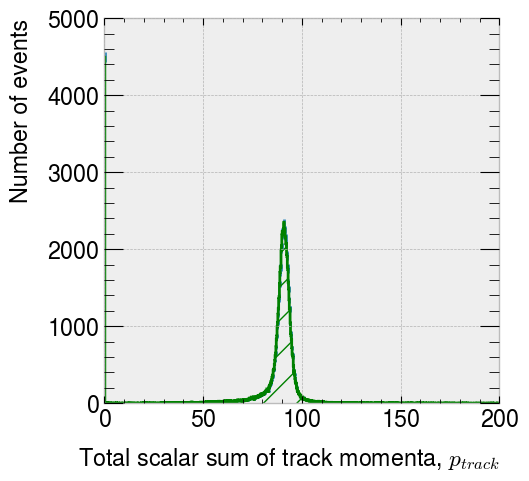

In [242]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(pchar_m[mymask],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Pcharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track momenta, $p_{track}$')
plt.ylabel('Number of events')
plt.show()

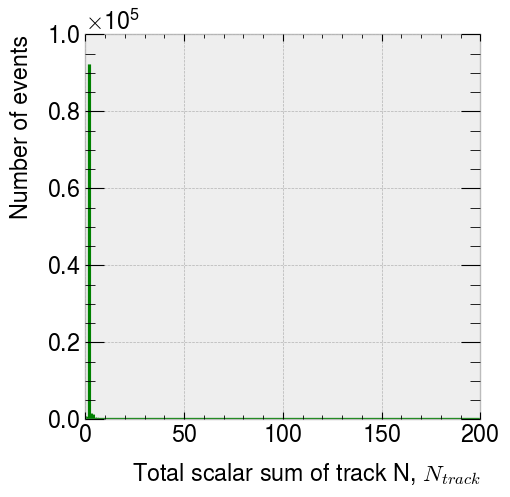

In [243]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(nchar_m[mymask2],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Ncharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track N, $N_{track}$')
plt.ylabel('Number of events')
plt.show()

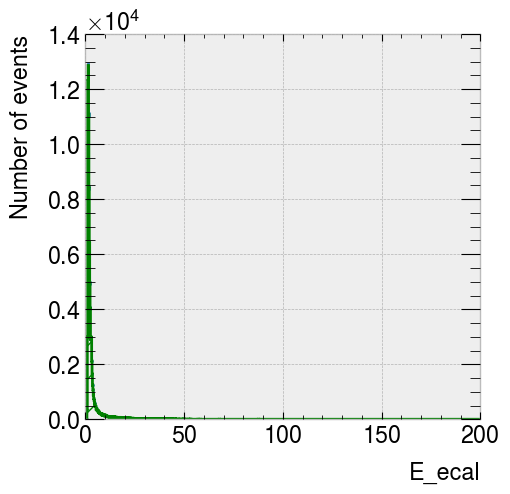

In [244]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_e_m[mymask3],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_ecal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('E_ecal')
plt.ylabel('Number of events')
plt.show()

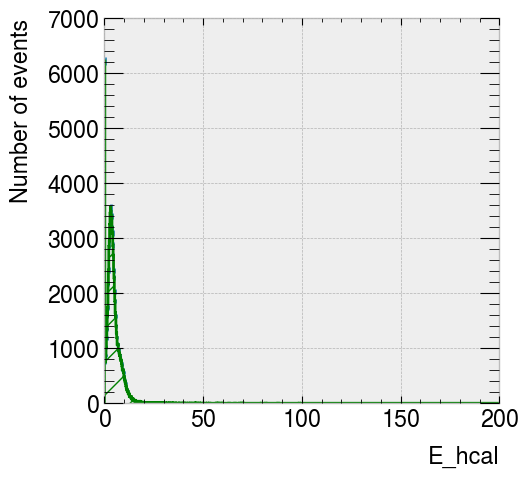

In [245]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_h_m[mymask4],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_hcal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('E_hcal')
plt.ylabel('Number of events')
plt.show()

### Hadrons

In [246]:
path_data = 'Data/'
#path_mc = 'samples/data'

### Open the file introducing file path
file = uproot.open(path_data+'qq.root')
ttree_name = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
file[ttree_name].keys()

## Load branches
branches = file[ttree_name].arrays()

## Define an numpy array for 'Pcharged'
var = 'Pcharged'
var1 = 'Ncharged'
var2 = 'E_ecal'
var3 = 'E_hcal'
pchar_h = ak.to_numpy(branches[var]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
nchar_h = ak.to_numpy(branches[var1]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_e_h = ak.to_numpy(branches[var2]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_h_h = ak.to_numpy(branches[var3]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions

print(f"Array of type '{type(pchar_h)}' defined for '{var}':\n{pchar_h}")
print(pchar_h.max())
print(f"Array of type '{type(nchar_h)}' defined for '{var1}':\n{nchar_h}")
print(nchar_h.max())
print(f"Array of type '{type(E_e_h)}' defined for '{var2}':\n{E_e_h}")
print(E_e_h.max())
print(f"Array of type '{type(E_h_h)}' defined for '{var3}':\n{E_h_h}")
print(E_h_h.max())


Array of type '<class 'numpy.ndarray'>' defined for 'Pcharged':
[36.15152  62.90951  66.66082  ... 65.85204  56.341167 68.896835]
45531.867
Array of type '<class 'numpy.ndarray'>' defined for 'Ncharged':
[25. 14. 17. ... 27. 24. 21.]
48.0
Array of type '<class 'numpy.ndarray'>' defined for 'E_ecal':
[45.34248  47.437466 66.6089   ... 57.751255 55.816082 55.587524]
107.534386
Array of type '<class 'numpy.ndarray'>' defined for 'E_hcal':
[11.599842 20.09169   4.80349  ...  9.828844 10.182688 21.44458 ]
95.673386


In [247]:
## Create a mask for certain selection
mymask = branches['Pcharged'] >= 0
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask)}' out of '{len(mymask)}' events passed the cut 'mymask'")

A total of '98563' out of '98563' events passed the cut 'mymask'


In [248]:
## Create a mask for certain selection
mymask2 = branches['Ncharged'] >= 10
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask2)}' out of '{len(mymask2)}' events passed the cut 'mymask'")

A total of '95307' out of '98563' events passed the cut 'mymask'


In [249]:
## Create a mask for certain selection
mymask3 = branches['E_ecal'] <= 100
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask3)}' out of '{len(mymask3)}' events passed the cut 'mymask'")

A total of '98555' out of '98563' events passed the cut 'mymask'


In [250]:
## Create a mask for certain selection
mymask4 = branches['E_hcal'] >= 10
#print(mymask)

## The sum of this array provides the number of events that passed this cut
print(f"A total of '{sum(mymask4)}' out of '{len(mymask4)}' events passed the cut 'mymask'")

A total of '56548' out of '98563' events passed the cut 'mymask'


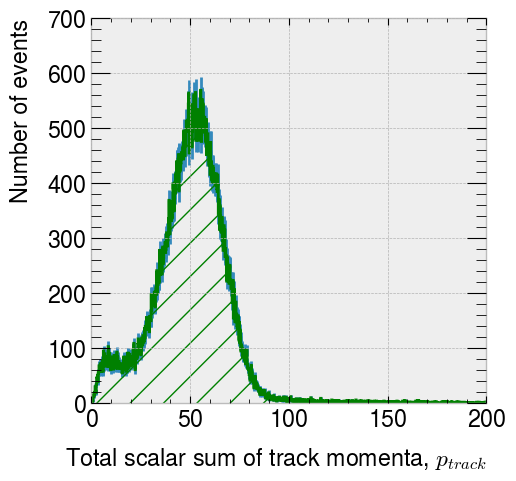

In [251]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(pchar_h[mymask],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Pcharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track momenta, $p_{track}$')
plt.ylabel('Number of events')
plt.show()

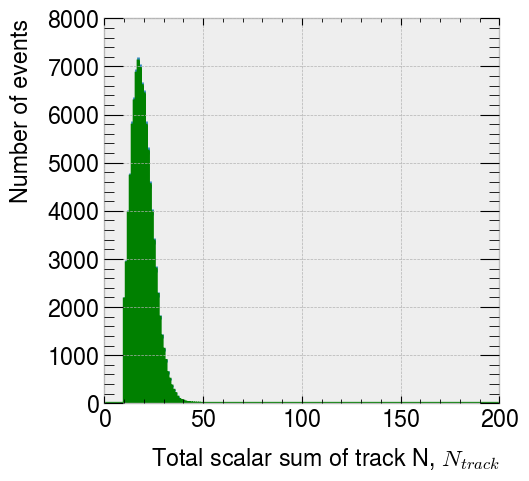

In [252]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(nchar_h[mymask2],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='Ncharged')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
plt.xlabel('Total scalar sum of track N, $N_{track}$')
plt.ylabel('Number of events')
plt.show()

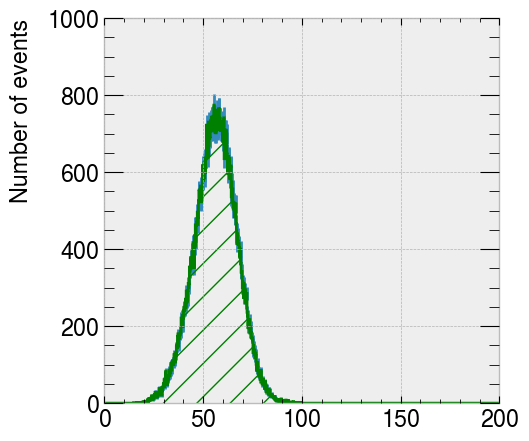

In [253]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_e_h[mymask3],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_ecal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
#plt.xlim(10.,150.)
#plt.xlabel('E_ecal')
plt.ylabel('Number of events')
plt.show()

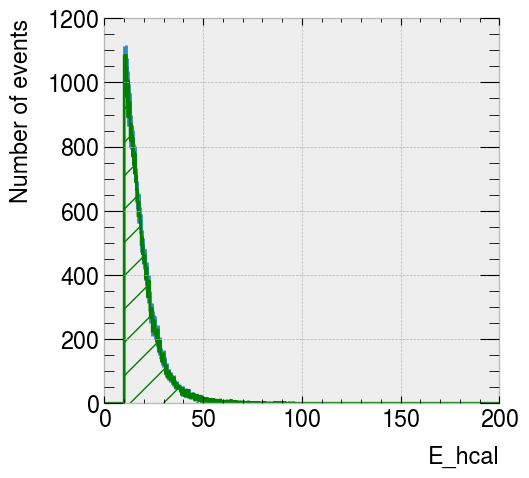

In [254]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.style.use('bmh') 
plt.figure(figsize=(5,5))

bin_content, bin_edges, _ = plt.hist(E_h_h[mymask4],bins=1000,range=(0.,200.), histtype='step',  linewidth=2, edgecolor='g', hatch='/', label='E_hcal')
mid = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content)

plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
#plt.title('My title')
plt.xlabel('E_hcal')
plt.ylabel('Number of events')
plt.show()

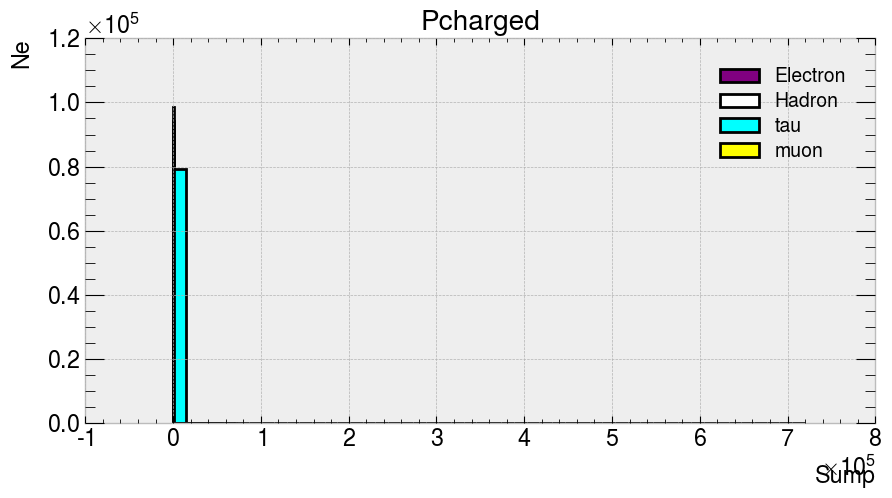

In [255]:
plt.style.use('bmh') 
plt.rcParams['figure.figsize'] = [10, 5]

plt.hist(pchar_e, bins=50, edgecolor='k', color='purple', lw=2, label='Electron')
plt.hist(pchar_h, bins=50, edgecolor='k', color='white', lw=2, label='Hadron')
plt.hist(pchar_t, bins=50, edgecolor='k', color= 'cyan', lw=2, label= 'tau')
plt.hist(pchar_m, bins=50, edgecolor='k', color='yellow', lw=2, label= 'muon')
plt.xlabel('Sump')
plt.ylabel('Ne')
plt.title('Pcharged')
plt.legend()
plt.show()

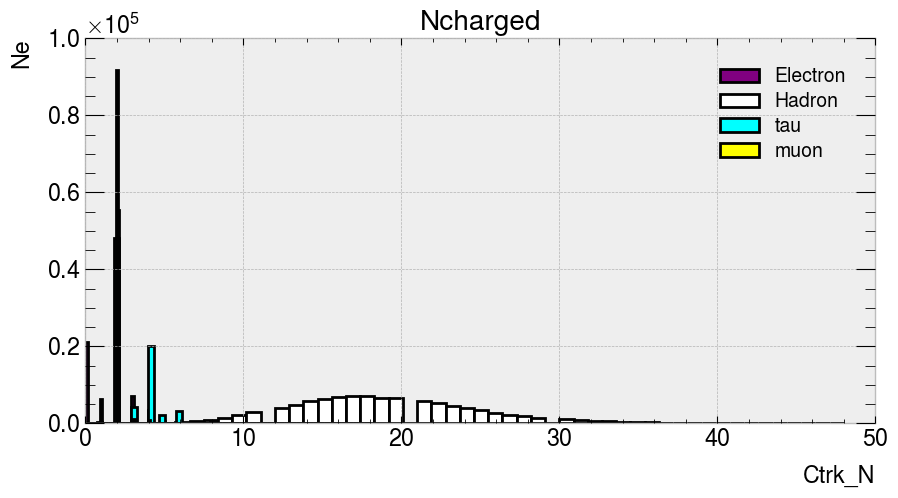

In [256]:
plt.style.use('bmh') 
plt.rcParams['figure.figsize'] = [10, 5]

plt.hist(nchar_e, bins=50, edgecolor='k', color='purple', lw=2, label='Electron')
plt.hist(nchar_h, bins=50, edgecolor='k', color='white', lw=2, label='Hadron')
plt.hist(nchar_t, bins=50, edgecolor='k', color= 'cyan', lw=2, label= 'tau')
plt.hist(nchar_m, bins=50, edgecolor='k', color='yellow', lw=2, label= 'muon')
plt.xlabel('Ctrk_N')
plt.ylabel('Ne')
plt.title('Ncharged')
plt.legend()
plt.show()

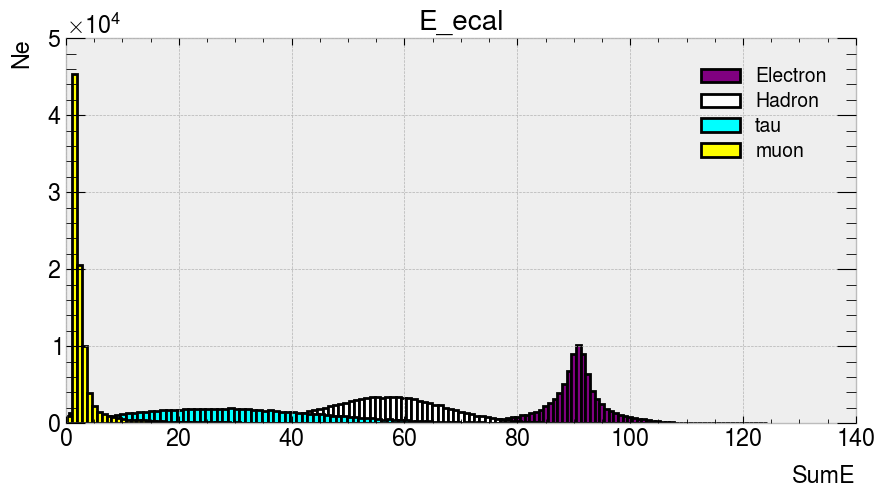

In [257]:
plt.style.use('bmh') 
plt.rcParams['figure.figsize'] = [10, 5]

plt.hist(E_e_e, bins=100, edgecolor='k', color='purple', lw=2, label='Electron')
plt.hist(E_e_h, bins=100, edgecolor='k', color='white', lw=2, label='Hadron')
plt.hist(E_e_t, bins=100, edgecolor='k', color= 'cyan', lw=2, label= 'tau')
plt.hist(E_e_m, bins=100, edgecolor='k', color='yellow', lw=2, label= 'muon')
plt.xlabel('SumE')
plt.ylabel('Ne')
plt.title('E_ecal')
plt.legend()
plt.show()

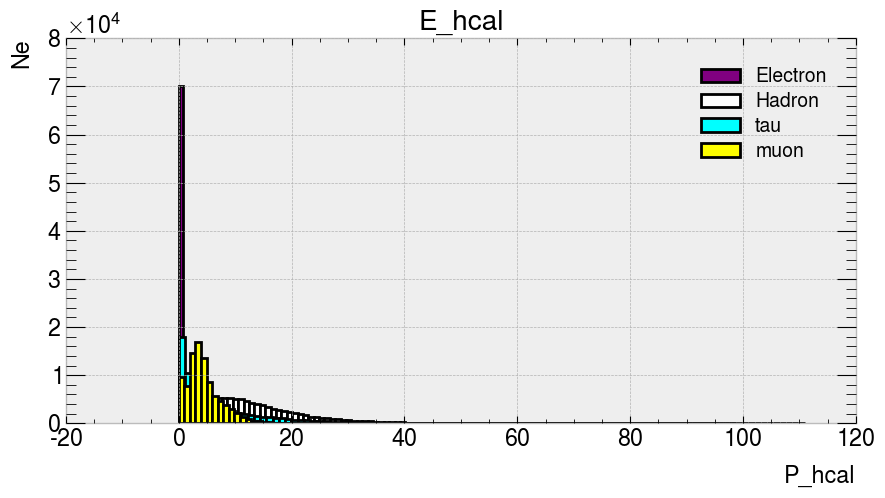

In [258]:
plt.style.use('bmh') 
plt.rcParams['figure.figsize'] = [10, 5]

plt.hist(E_h_e, bins=100, edgecolor='k', color='purple', lw=2, label='Electron')
plt.hist(E_h_h, bins=100, edgecolor='k', color='white', lw=2, label='Hadron')
plt.hist(E_h_t, bins=100, edgecolor='k', color= 'cyan', lw=2, label= 'tau')
plt.hist(E_h_m, bins=100, edgecolor='k', color='yellow', lw=2, label= 'muon')
plt.xlabel('P_hcal')
plt.ylabel('Ne')
plt.title('E_hcal')
plt.legend()
plt.show()

### Some useful information about your selection

In [42]:
print(f"Mean of {var}: ({pchar_e.mean()}) {np.nanmean(pchar_e)}")
print(f"Standard deviation of {var}: ({pchar_e.std()}) {np.nanstd(pchar_e)}")
print(f"Minimum value of {var}: ({pchar_e.min()}) {np.nanmin(pchar_e)}")
print(f"Maximum value of {var}: ({pchar_e.max()}) {np.nanmax(pchar_e)}")

Mean of Pcharged: (43.305538177490234) 43.305538177490234
Standard deviation of Pcharged: (210.00775146484375) 210.00775146484375
Minimum value of Pcharged: (0.0) 0.0
Maximum value of Pcharged: (55299.58984375) 55299.58984375


In [43]:
print(f"Mean of {var}: ({pchar_h.mean()}) {np.nanmean(pchar_h)}")
print(f"Standard deviation of {var}: ({pchar_h.std()}) {np.nanstd(pchar_h)}")
print(f"Minimum value of {var}: ({pchar_h.min()}) {np.nanmin(pchar_h)}")
print(f"Maximum value of {var}: ({pchar_h.max()}) {np.nanmax(pchar_h)}")

Mean of Pcharged: (55.68336486816406) 55.68336486816406
Standard deviation of Pcharged: (311.40924072265625) 311.40924072265625
Minimum value of Pcharged: (0.0) 0.0
Maximum value of Pcharged: (45531.8671875) 45531.8671875


In [44]:
print(f"Mean of {var}: ({pchar_t.mean()}) {np.nanmean(pchar_t)}")
print(f"Standard deviation of {var}: ({pchar_t.std()}) {np.nanstd(pchar_t)}")
print(f"Minimum value of {var}: ({pchar_t.min()}) {np.nanmin(pchar_t)}")
print(f"Maximum value of {var}: ({pchar_t.max()}) {np.nanmax(pchar_t)}")

Mean of Pcharged: (48.321231842041016) 48.321231842041016
Standard deviation of Pcharged: (2635.77001953125) 2635.77001953125
Minimum value of Pcharged: (0.0) 0.0
Maximum value of Pcharged: (719342.8125) 719342.8125


In [45]:
print(f"Mean of {var}: ({pchar_m.mean()}) {np.nanmean(pchar_m)}")
print(f"Standard deviation of {var}: ({pchar_m.std()}) {np.nanstd(pchar_m)}")
print(f"Minimum value of {var}: ({pchar_m.min()}) {np.nanmin(pchar_m)}")
print(f"Maximum value of {var}: ({pchar_m.max()}) {np.nanmax(pchar_m)}")

Mean of Pcharged: (88.13310241699219) 88.13310241699219
Standard deviation of Pcharged: (256.1211242675781) 256.1211242675781
Minimum value of Pcharged: (0.0) 0.0
Maximum value of Pcharged: (73101.0546875) 73101.0546875
